In [12]:
import sys

for a in ['', '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python37.zip',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/lib-dynload',
          '/Users/kristjan.roosild/.local/lib/python3.7/site-packages',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages',
          '/Users/kristjan.roosild/projects/donkeycar',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg']:
    sys.path.append(a)

In [13]:


import numpy as np
import donkeycar as dk

In [26]:
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)


def rmse(image1, image2):
    return np.sqrt(mse(image1, image2))

In [14]:
cfg = dk.load_config(config_path='/Users/kristjan.roosild/mycar/config.py')

loading config file: /Users/kristjan.roosild/mycar/config.py
loading personal config over-rides from myconfig.py


In [109]:
import os

from donkeycar.pipeline.sequence import TubRecord
from donkeycar.pipeline.types import TubDataset

def load_tub_images(tub_path, cfg):
    dataset = TubDataset(cfg, [os.path.expanduser(tub_path)])
    images = []
    for tub in dataset.tubs:
        for underlying in tub:
            record = TubRecord(cfg, tub.base_path, underlying)
            images.append(record.image())
    return images

tubs = [
    'tub_2_22-02-05',
    'tub_3_22-02-05',
    'tub_4_22-02-05',
    'tub_10_22-02-06',
    'tub_11_22-02-06',
    'tub_12_22-02-06',
    'tub_3_22-02-07',
    'tub_4_22-02-07',
    'tub_5_22-02-07',
    'tub_6_22-02-07',
    'tub_7_22-02-07',
]
tub_images = {}

for tub_path in tubs:
    full_path = '/Users/kristjan.roosild/OneDrive/kool/maka/data/' + tub_path
    images = load_tub_images(full_path, cfg)
    tub_images[tub_path] = images


Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_2_22-02-05/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_3_22-02-05/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_4_22-02-05/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_10_22-02-06/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_11_22-02-06/catalog_2.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_12_22-02-06/catalog_6.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_3_22-02-07/catalog_6.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_4_22-02-07/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_5_22-02-07/catalog_5.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/tub_6_22-02-07/catalog_7.catalog
Using catalog /Users/kristjan.roosild/OneDrive/

In [334]:

def get_diffs(images):
    return [rmse(images[0], img) for img in images]

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [30/2.54, 25/2.54]

def plot_image_diffs(images, name):
    diffs = get_diffs(images)
    plt.figure()
    plt.ylim(8.5,10.6)
    plt.plot(diffs)
    plt.title(name)
    plt.xticks(range(0, len(images), 500))
    plt.xlabel('frame number')
    plt.ylabel('RMS image difference')
    plt.grid()
    plt.show()

def get_counts(diffs, lower_bound=8.8, upper_bound=9.75):
    flip = False
    counts = []
    for i, d in enumerate(diffs):
        if not flip and d < lower_bound and (len(counts) == 0 or i - counts[-1] > 165):
            flip = True
            counts.append(i)
        if flip and d > upper_bound:
            flip = False
    return np.array(counts)

def get_lengths(counts):
    return counts[1:] - counts[:-1]

def plot_lap_frame_counts(images, name, lower_bound=8.8, upper_bound=9.75):
    diffs = get_diffs(images)
    counts = get_counts(diffs, lower_bound, upper_bound)
    lengths = get_lengths(counts)
    plt.figure()
    plt.bar(range(1, len(lengths)+1), lengths)
    plt.title(name)
    plt.xticks(range(1, len(lengths)+1))
    plt.xlabel('lap')
    plt.ylabel('frames')
    plt.grid(axis='y')
    plt.show()

def get_lengths_and_mean(images, lower_bound, upper_bound):
    diffs = get_diffs(images)
    counts = get_counts(diffs, lower_bound, upper_bound)
    lengths = get_lengths(counts)
    return lengths, int(np.mean(lengths))

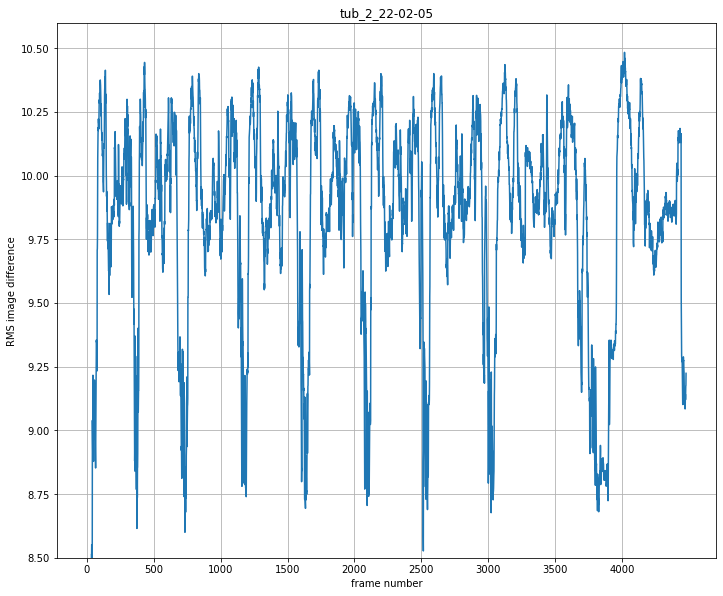

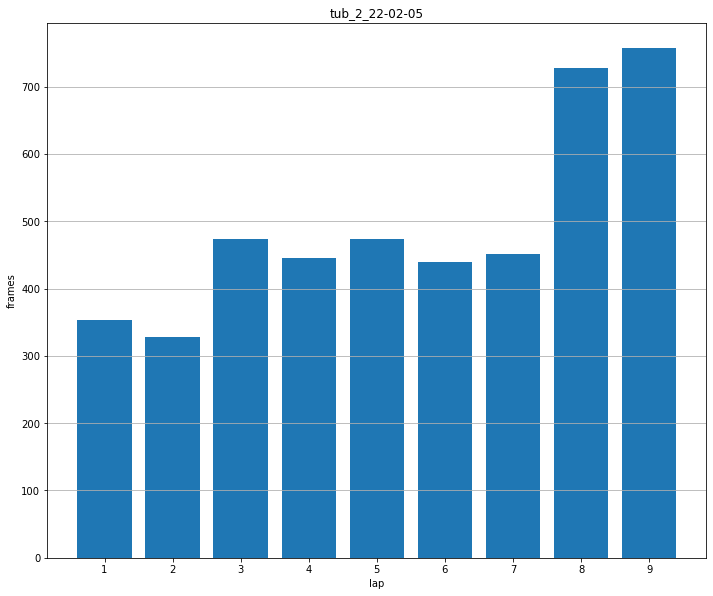

In [323]:
name = tubs[0]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 10.1)


In [324]:
lengths, mean = get_lengths_and_mean(images, 9.25, 10.1)

lengths, mean, np.mean(lengths[:-2])

(array([354, 328, 473, 446, 473, 440, 452, 728, 757]), 494, 423.7142857142857)

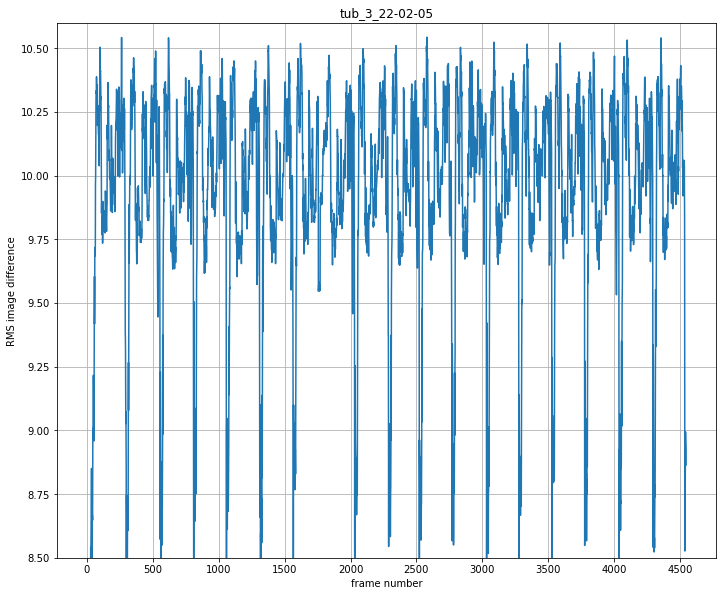

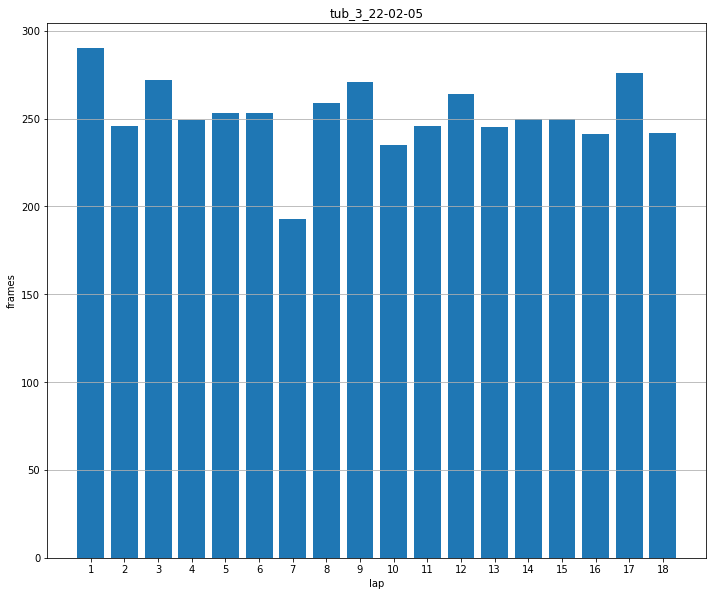

In [325]:
name = tubs[1]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.55, 10)


In [326]:
lengths, mean = get_lengths_and_mean(images, 9.55, 10)

lengths, mean

(array([290, 246, 272, 249, 253, 253, 193, 259, 271, 235, 246, 264, 245,
        250, 250, 241, 276, 242]),
 251)

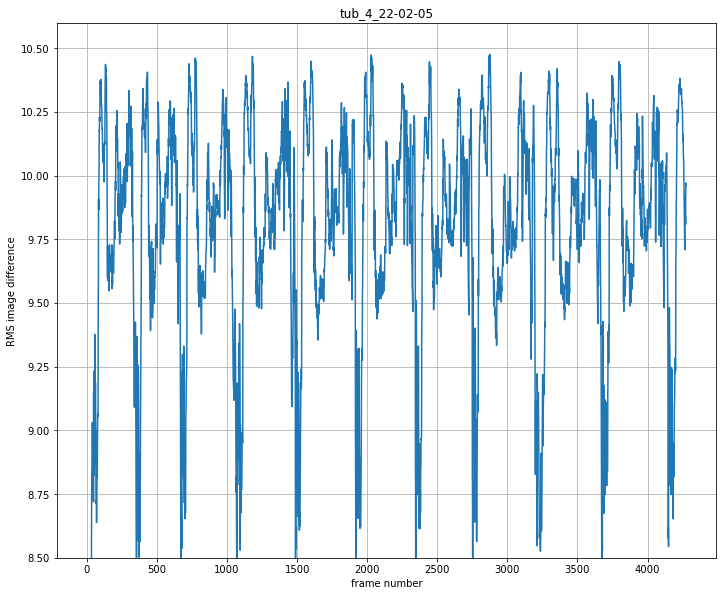

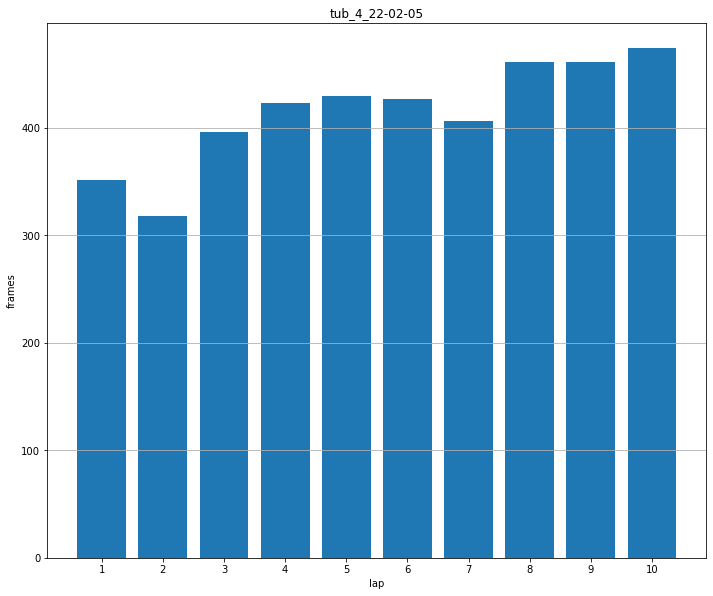

In [327]:
name = tubs[2]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name)


In [328]:
lengths, mean = get_lengths_and_mean(images, 8.8, 9.75)

lengths, mean

(array([351, 318, 396, 423, 430, 427, 406, 461, 461, 474]), 414)

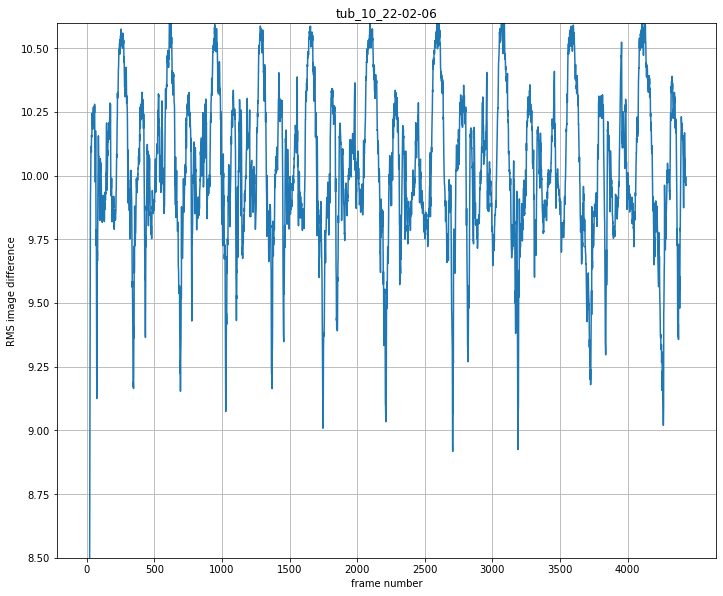

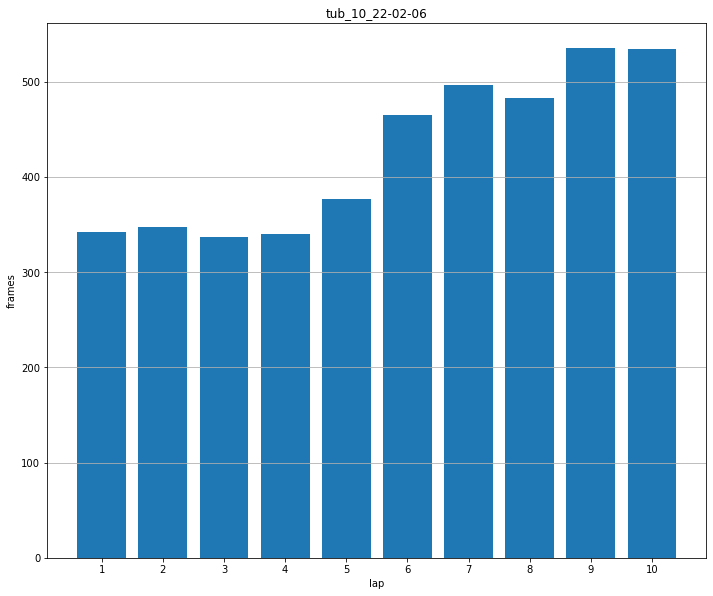

In [329]:
name = tubs[3]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 10.4)


In [330]:
lengths, mean = get_lengths_and_mean(images, 9.25, 10.4)

lengths, mean

(array([342, 347, 337, 340, 377, 465, 496, 483, 535, 534]), 425)

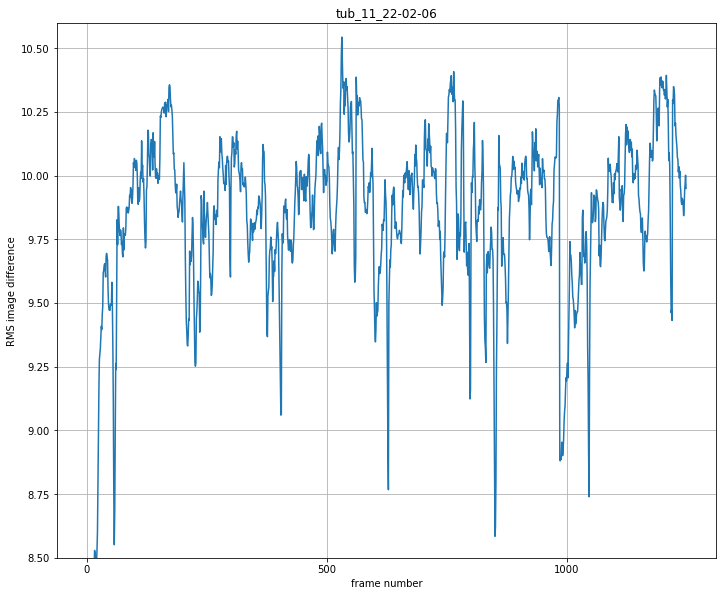

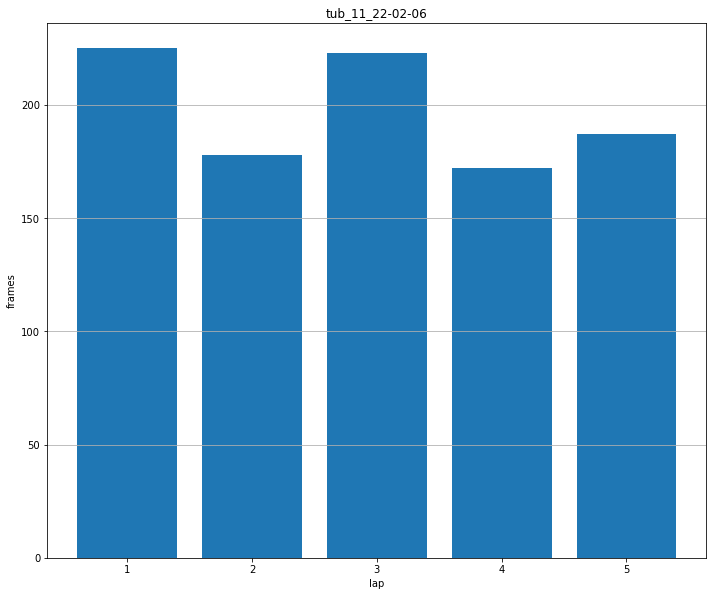

In [335]:
name = tubs[4]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.28, 10)


In [336]:
lengths, mean = get_lengths_and_mean(images, 9.28, 10)

lengths, mean

(array([225, 178, 223, 172, 187]), 197)

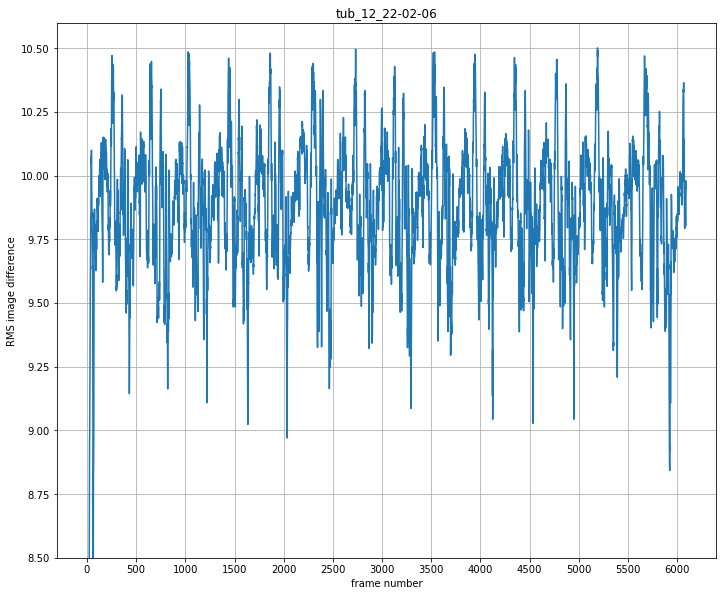

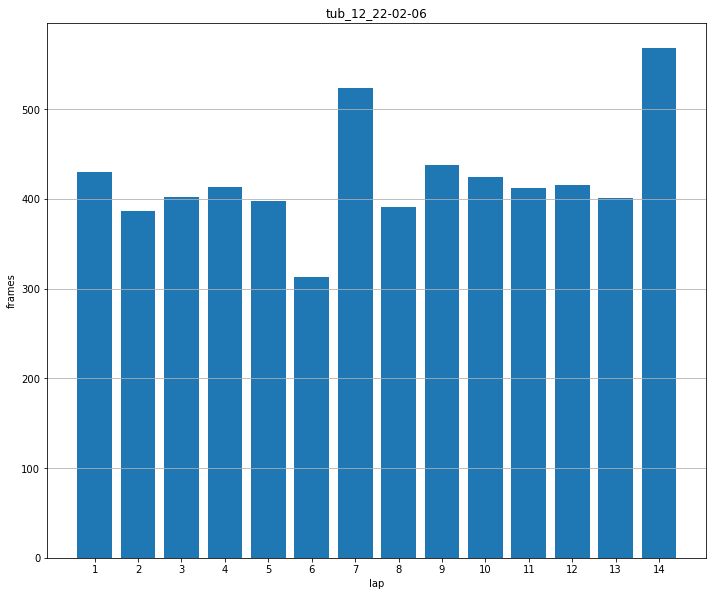

In [337]:
name = tubs[5]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.35, 10.0)


In [338]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)

lengths, mean

(array([430, 387, 402, 413, 398, 313, 524, 391, 438, 424, 412, 416, 401,
        568]),
 422)

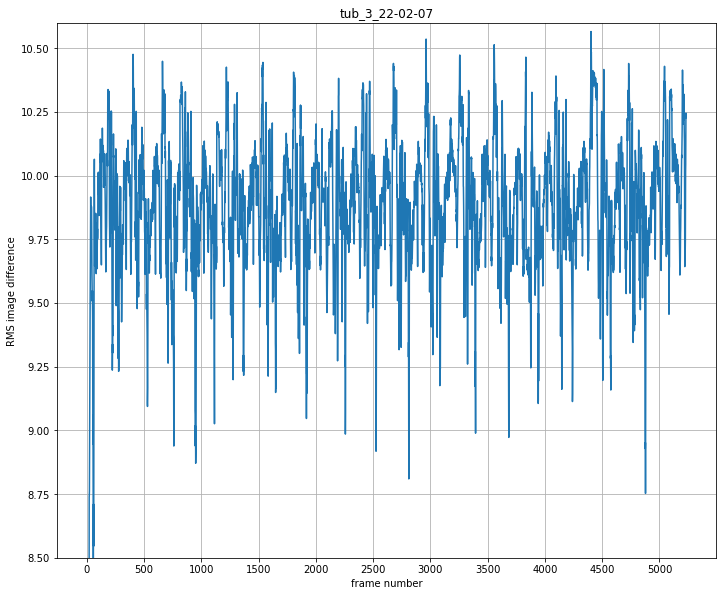

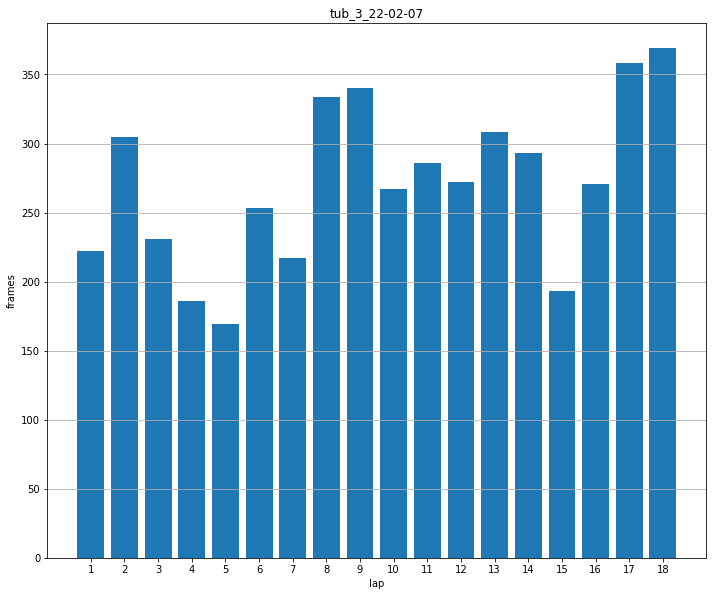

In [339]:
name = tubs[6]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 9.8)


In [340]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)

lengths, mean

(array([221, 306, 182, 234, 169, 254, 216, 274, 332, 336, 202, 295, 303,
        358, 194, 270, 358, 266]),
 265)

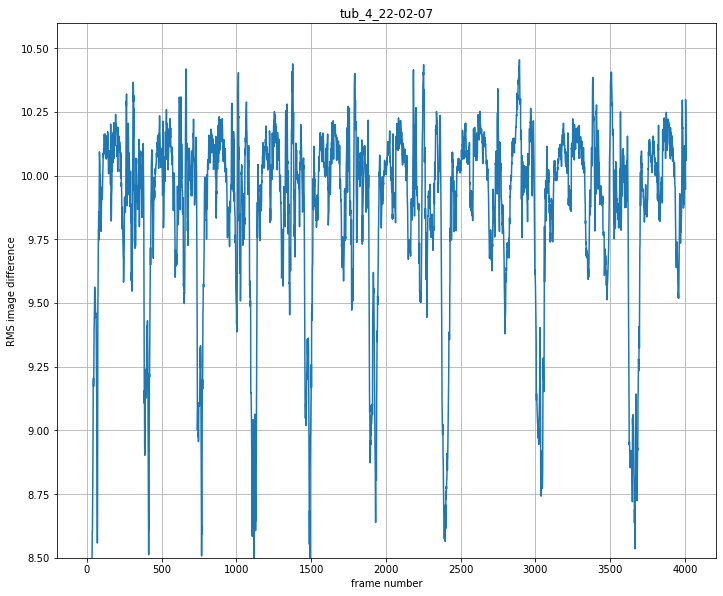

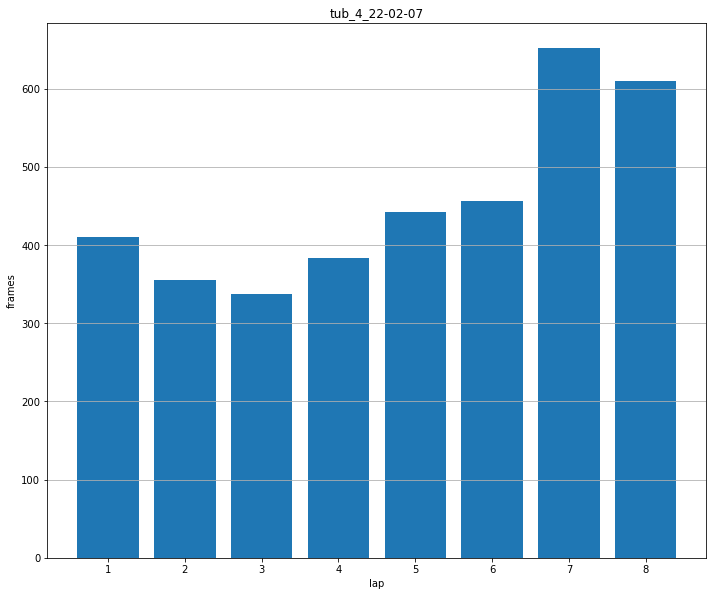

In [343]:
name = tubs[7]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 10)


In [344]:
lengths, mean = get_lengths_and_mean(images, 8.75, 10)

lengths, mean

(array([411, 355, 338, 383, 443, 456, 652, 610]), 456)

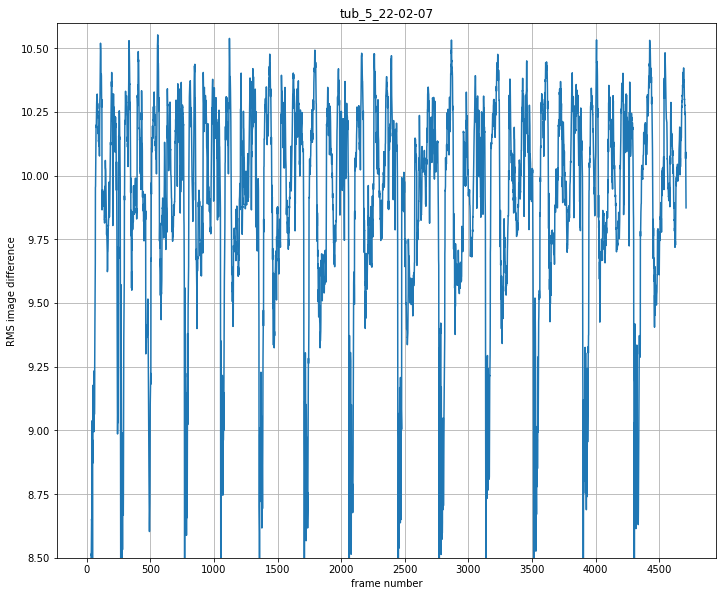

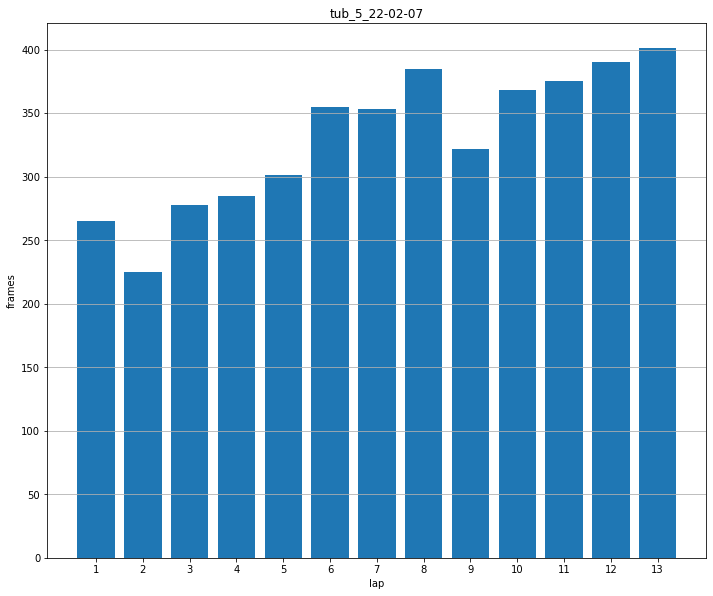

In [347]:
name = tubs[8]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 9.5)


In [348]:
lengths, mean = get_lengths_and_mean(images, 8.75, 9.5)

lengths, mean

(array([265, 225, 278, 285, 301, 355, 353, 385, 322, 368, 375, 390, 401]), 331)

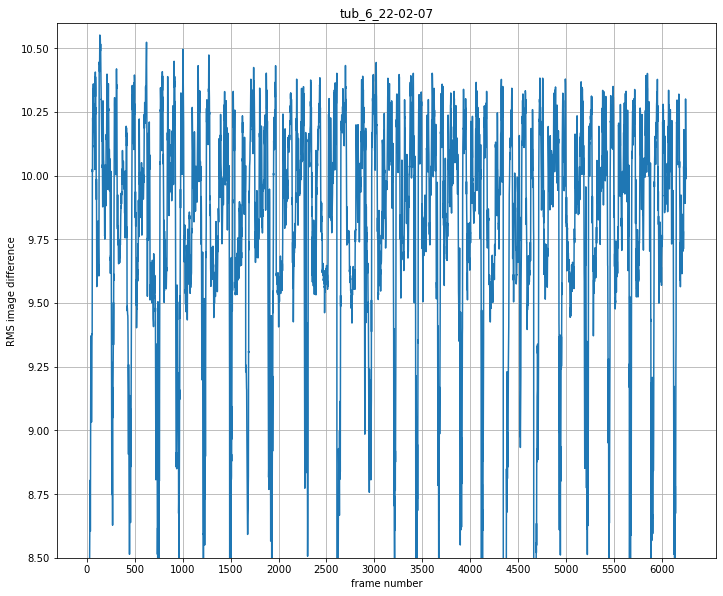

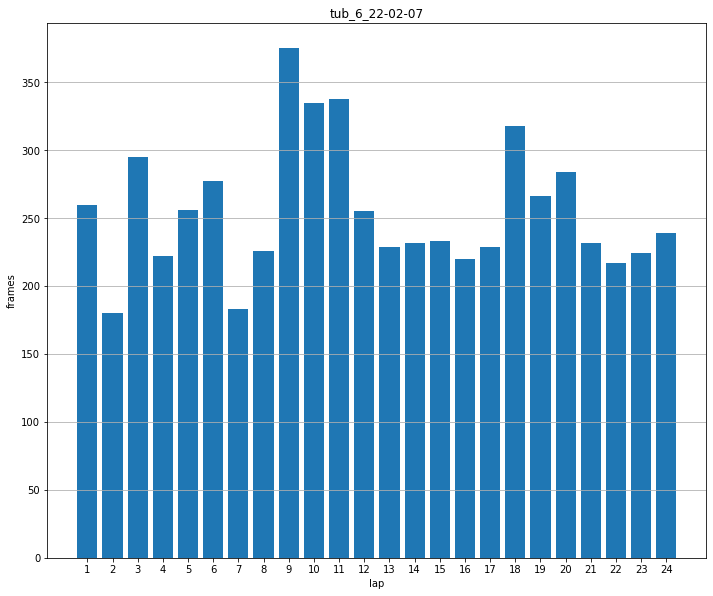

In [350]:
name = tubs[9]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.8, 10)


In [351]:
lengths, mean = get_lengths_and_mean(images, 8.8, 10)

lengths, mean

(array([260, 180, 295, 222, 256, 277, 183, 226, 375, 335, 338, 255, 229,
        232, 233, 220, 229, 318, 266, 284, 232, 217, 224, 239]),
 255)

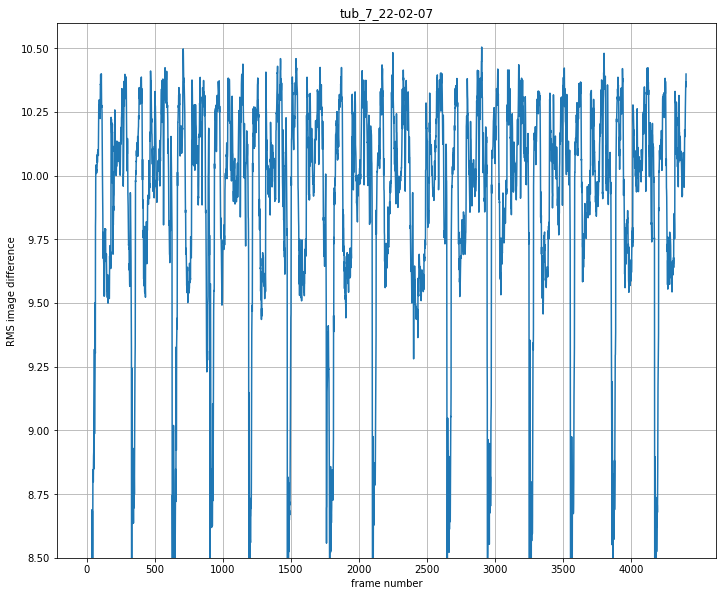

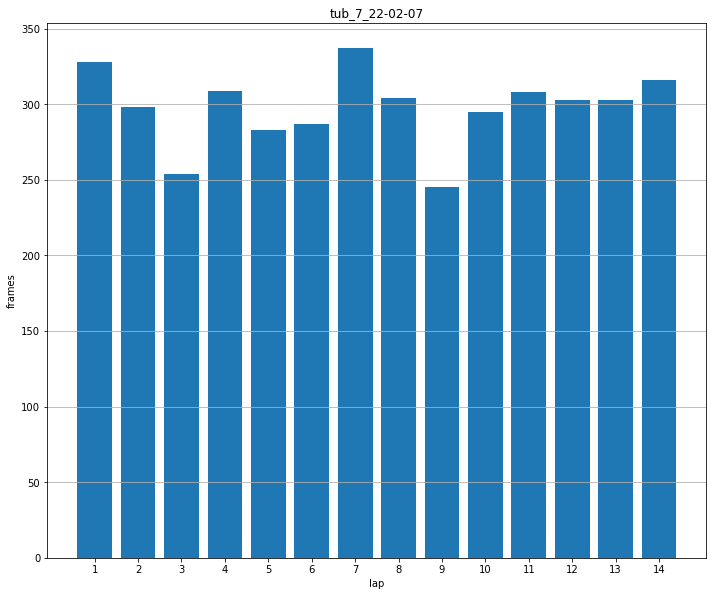

In [353]:
name = tubs[10]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.3, 10)

In [354]:
lengths, mean = get_lengths_and_mean(images, 9.3, 10)

lengths, mean

(array([328, 298, 254, 309, 283, 287, 337, 304, 245, 295, 308, 303, 303,
        316]),
 297)